In [2]:
import scipy
from netCDF4 import Dataset
import numpy as np
from scipy.spatial import KDTree
from ll_xy import lonlat_to_xy
import itertools
import matplotlib.pyplot as plt
import datetime
import calendar
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import tqdm
import os
import pickle

server_dir = '/home/robbie/uit_mnt'
scratch_dir = f'{server_dir}/scratch/robbie/'
satam_directory = f'{server_dir}/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/'
sea_ice_type_directory=f'{satam_directory}OSISAF Sea Ice Type'

# Get some type data

year=2010
month_folder = f'{sea_ice_type_directory}/{year}/10/'
type_string = f'{year}{10}01'
f = f'ice_type_nh_polstere-100_multi_{type_string}1200.nc'
d_type = Dataset(f'{month_folder}{f}')
longrid = np.array(d_type['lon'])
latgrid = np.array(d_type['lat'])

cs2_mon_yr_pairs = pickle.load(open('cs2_m_y_pairs.p','rb'))


list_of_dicts = []

for year,month in tqdm.tqdm(cs2_mon_yr_pairs):
    
    days_in_month  = calendar.monthrange(year,month)[1]
    
    month_folder = f'{sea_ice_type_directory}/{year}/{str(month).zfill(2)}/'
    
    for day in np.arange(1,days_in_month):
        
        # Perform global October 1st Mask
        
        #sig[mask==0] = np.nan


        type_string = f'{year}{str(month).zfill(2)}{str(day).zfill(2)}'

        f = f'ice_type_nh_polstere-100_multi_{type_string}1200.nc'
        
#         FYI == 2
#         MYI == 3
        d_type = Dataset(f'{month_folder}{f}')
        ice_type = np.array(d_type['ice_type'][0]).astype(np.float32)
        ice_type[ice_type>4]=np.nan
        ice_type[ice_type<2]=np.nan
        ice_type[~np.isnan(ice_type)]=1
        
        ## Bounding box

        ice_type[longrid>-72] = np.nan
        ice_type[longrid<-98] = np.nan
        ice_type[latgrid>66] = np.nan
        ice_type[latgrid<50] = np.nan
        
        pseudo_area = np.nansum(ice_type)
        
        dt = datetime.date(year,month,day)
        
        
        list_of_dicts.append({'dt':dt,
                              'area':pseudo_area})
        
    

100%|███████████████████████████████████████████| 91/91 [10:22<00:00,  6.84s/it]


In [26]:
df = pd.DataFrame(list_of_dicts)
df.sort_values('dt',inplace=True)
pickle.dump(df,open('hudson_areas.p','wb'))

52

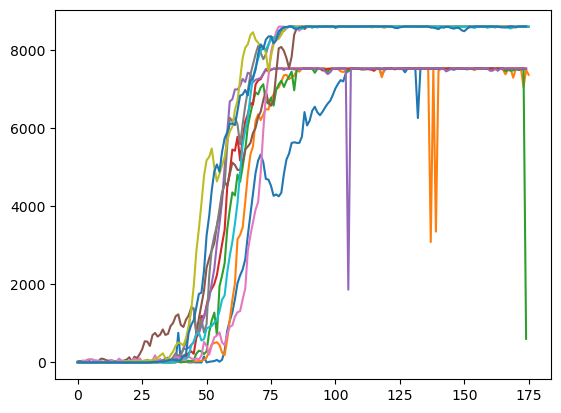

In [48]:
thresh_days = []

for year in np.arange(2010,2021):
    dt0 = datetime.date(year,10,1)
    dt1 = datetime.date(year+1,4,1)
    
    df_s = df[(df['dt']>dt0)&(df['dt']<dt1)]
    
    thresh_day =  df_s['dt'].iloc[np.argmax(df_s['area']>4000)]
    
    thresh_days.append({'dt':thresh_day,'year':year,'delta_t':(thresh_day-dt0).days})
    
    plt.plot(np.array(df_s['area']))

thresh_days = pd.DataFrame(thresh_days)

In [52]:
pickle.dump(thresh_days,open('thresh_days.p','wb'))

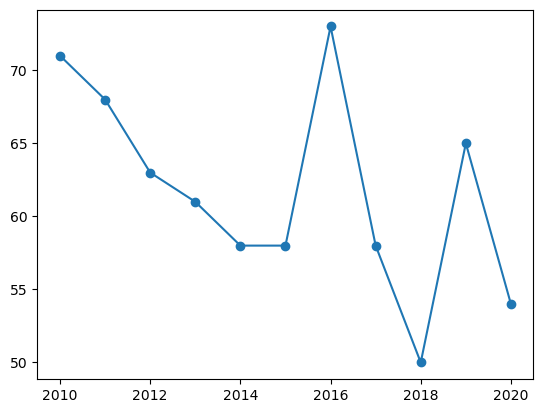

In [49]:
plt.plot(thresh_days['year'],thresh_days['delta_t'],marker='o')

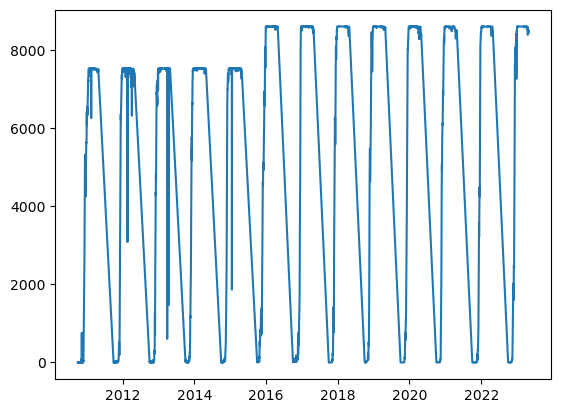

In [8]:
plt.plot(df['dt'],df['area'])

In [9]:
from cartoplot import cartoplot

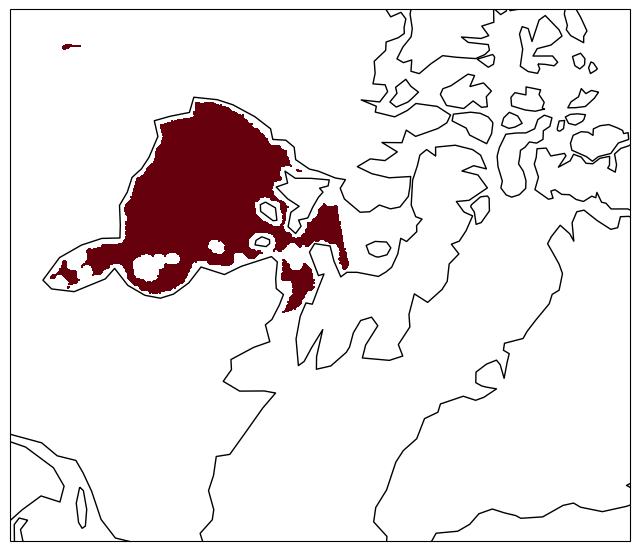

In [25]:
year=2014
month_folder = f'{sea_ice_type_directory}/{year}/03/'
type_string = f'{year}0301'
f = f'ice_type_nh_polstere-100_multi_{type_string}1200.nc'
d_type = Dataset(f'{month_folder}{f}')

ice_type = np.array(d_type['ice_type'][0]).astype(np.float32)
ice_type[ice_type>4]=np.nan
ice_type[ice_type<2]=np.nan
ice_type[~np.isnan(ice_type)]=1

## Bounding box

ice_type[longrid>-72] = np.nan
ice_type[longrid<-98] = np.nan
ice_type[latgrid>66] = np.nan
ice_type[latgrid<50] = np.nan


fig = plt.figure(figsize=(8,8))

proj = ccrs.NorthPolarStereo()

ax = plt.axes(projection=proj)

ax.set_extent([-100, -60, 80, 50], ccrs.PlateCarree())

ax.coastlines(resolution='110m')

m = ax.pcolormesh(longrid,
                  latgrid,
                  ice_type,
                  vmin = 0,
                  vmax = 1,
                 transform=ccrs.PlateCarree(),
                  zorder=0,cmap='Reds')


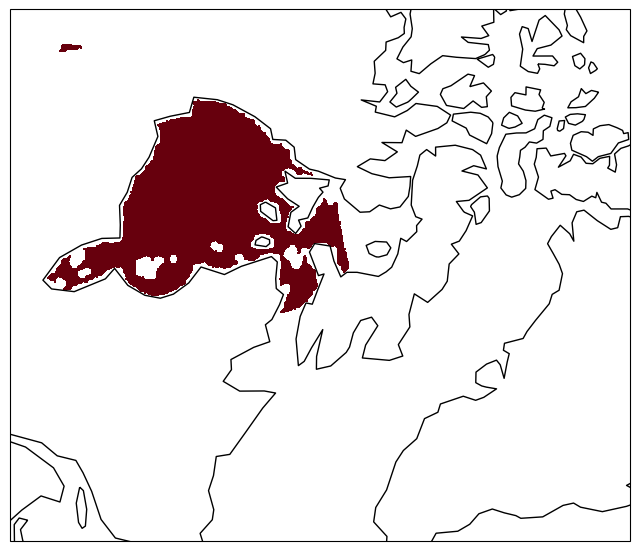

In [24]:
year=2019
month_folder = f'{sea_ice_type_directory}/{year}/03/'
type_string = f'{year}0301'
f = f'ice_type_nh_polstere-100_multi_{type_string}1200.nc'
d_type = Dataset(f'{month_folder}{f}')

ice_type = np.array(d_type['ice_type'][0]).astype(np.float32)
ice_type[ice_type>4]=np.nan
ice_type[ice_type<2]=np.nan
ice_type[~np.isnan(ice_type)]=1

## Bounding box

ice_type[longrid>-72] = np.nan
ice_type[longrid<-98] = np.nan
ice_type[latgrid>66] = np.nan
ice_type[latgrid<50] = np.nan


fig = plt.figure(figsize=(8,8))

proj = ccrs.NorthPolarStereo()

ax = plt.axes(projection=proj)

ax.set_extent([-100, -60, 80, 50], ccrs.PlateCarree())

ax.coastlines(resolution='110m')

m = ax.pcolormesh(longrid,
                  latgrid,
                  ice_type,
                  vmin = 0,
                  vmax = 1,
                 transform=ccrs.PlateCarree(),
                  zorder=0,cmap='Reds')
